# Libraries

In [1]:
# Cleaning & Visualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# ml tools
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OneHotEncoder,
                                   RobustScaler,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import ( cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV,
                                    RandomizedSearchCV)

from sklearn.pipeline import Pipeline , make_pipeline
from scipy.stats import randint

# models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# metrics
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             classification_report,
                             confusion_matrix)

# Remove Warnings

In [3]:
import warnings
warnings.simplefilter("ignore")

# Reading The Data

In [4]:
df = pd.read_csv("diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Getting Some Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.nunique().sort_values(ascending=False)

DiabetesPedigreeFunction    517
BMI                         248
Insulin                     186
Glucose                     136
Age                          52
SkinThickness                51
BloodPressure                47
Pregnancies                  17
Outcome                       2
dtype: int64

In [7]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [8]:
for column in df:
    value_counts_all = df[column].value_counts()
    print(f"\nValue counts for column '{column}':\n{value_counts_all}")


Value counts for column 'Pregnancies':
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

Value counts for column 'Glucose':
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

Value counts for column 'BloodPressure':
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

Value counts for column 

# Handling Zeros

In [9]:
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in cols:
    print(f"Number of zeros for column {col} is: {df[col].value_counts()[0]/len(df)*100} %")

Number of zeros for column Glucose is: 0.6510416666666667 %
Number of zeros for column BloodPressure is: 4.557291666666666 %
Number of zeros for column SkinThickness is: 29.557291666666668 %
Number of zeros for column Insulin is: 48.69791666666667 %
Number of zeros for column BMI is: 1.4322916666666665 %


* We have some values equal zero which is not normal in some featuers so we may implement it .

In [10]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols:
    df[col] = df[col].replace(0, np.nan)

for col in cols:
    print(f"Number of zeros for column {col} is: {df[col].isna().sum()/len(df)*100} %")

Number of zeros for column Glucose is: 0.6510416666666667 %
Number of zeros for column BloodPressure is: 4.557291666666666 %
Number of zeros for column SkinThickness is: 29.557291666666668 %
Number of zeros for column Insulin is: 48.69791666666667 %
Number of zeros for column BMI is: 1.4322916666666665 %


In [11]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols:
    describe_column = df.groupby('Outcome')[[col]].describe()
    print(describe_column)

        Glucose                                                         
          count        mean        std   min    25%    50%    75%    max
Outcome                                                                 
0         497.0  110.643863  24.776906  44.0   93.0  107.0  125.0  197.0
1         266.0  142.319549  29.599199  78.0  119.0  140.0  167.0  199.0
        BloodPressure                                                     
                count       mean        std   min   25%   50%   75%    max
Outcome                                                                   
0               481.0  70.877339  12.161223  24.0  62.0  70.0  78.0  122.0
1               252.0  75.321429  12.299866  30.0  68.0  74.5  84.0  114.0
        SkinThickness                                                   
                count       mean        std  min   25%   50%   75%   max
Outcome                                                                 
0               361.0  27.235457  10.0264

In [12]:
def impute_zeros_with_mean(df, column_name):
    mean_column = df.groupby('Outcome')[column_name].transform(lambda x: x.fillna(x.mean()))
    df[column_name] = df[column_name].combine_first(mean_column)
    return df

In [13]:
impute_zeros_with_mean(df, 'Glucose')
impute_zeros_with_mean(df, 'BloodPressure')
impute_zeros_with_mean(df, 'SkinThickness')
impute_zeros_with_mean(df, 'BMI')
impute_zeros_with_mean(df, "Insulin")

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0           35.0  206.846154  33.6   
1              1     85.0           66.0           29.0  130.287879  26.6   
2              8    183.0           64.0           33.0  206.846154  23.3   
3              1     89.0           66.0           23.0   94.000000  28.1   
4              0    137.0           40.0           35.0  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0           48.0  180.000000  32.9   
764            2    122.0           70.0           27.0  130.287879  36.8   
765            5    121.0           72.0           23.0  112.000000  26.2   
766            1    126.0           60.0           33.0  206.846154  30.1   
767            1     93.0           70.0           31.0  130.287879  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [14]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in cols:
    describe_column = df.groupby('Outcome')[[col]].describe()
    print(describe_column)

        Glucose                                                         
          count        mean        std   min    25%    50%    75%    max
Outcome                                                                 
0         500.0  110.643863  24.702314  44.0   93.0  107.5  125.0  197.0
1         268.0  142.319549  29.488132  78.0  119.0  140.5  167.0  199.0
        BloodPressure                                                     \
                count       mean        std   min   25%        50%   75%   
Outcome                                                                    
0               500.0  70.877339  11.927450  24.0  63.5  70.877339  78.0   
1               268.0  75.321429  11.925638  30.0  68.0  75.321429  82.0   

                
           max  
Outcome         
0        122.0  
1        114.0  
        SkinThickness                                                       
                count       mean       std  min   25%        50%   75%   max
Outcome        

In [15]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.697358      72.428141      29.247042  157.003527   
std       3.369578   30.462008      12.106044       8.923908   88.860914   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      28.000000  130.287879   
75%       6.000000  141.000000      80.000000      33.000000  206.846154   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

             BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.00000                768.000000  768.000000  768.000000  
mean    32.44642                  0.471876   33.240885    0.348958  
std      6.87897                  0.331329   11.760232    0.476951  
min     18.20000                  0.078000   21.000000    0.000000  
25%     27.50000                  0.243750   24.000000    0.000000  
50%     32.05000                  0.372500   29.000000    0.000000  
75%     36.60000                  0.626250   41.000000    1.000000  
max     67.10000                  2.420000   81.000000    1.000000

# Data Exploration

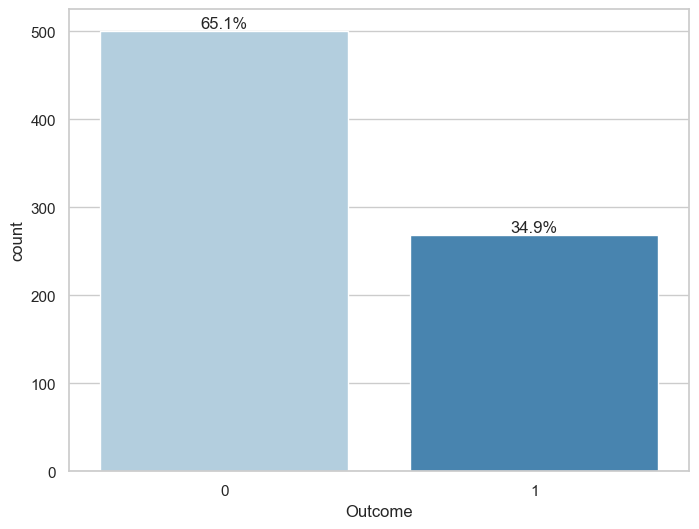

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Outcome", data=df, palette="Blues")

total = len(df['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

* Looks like we have imbalanced data .

## Data Distirbution

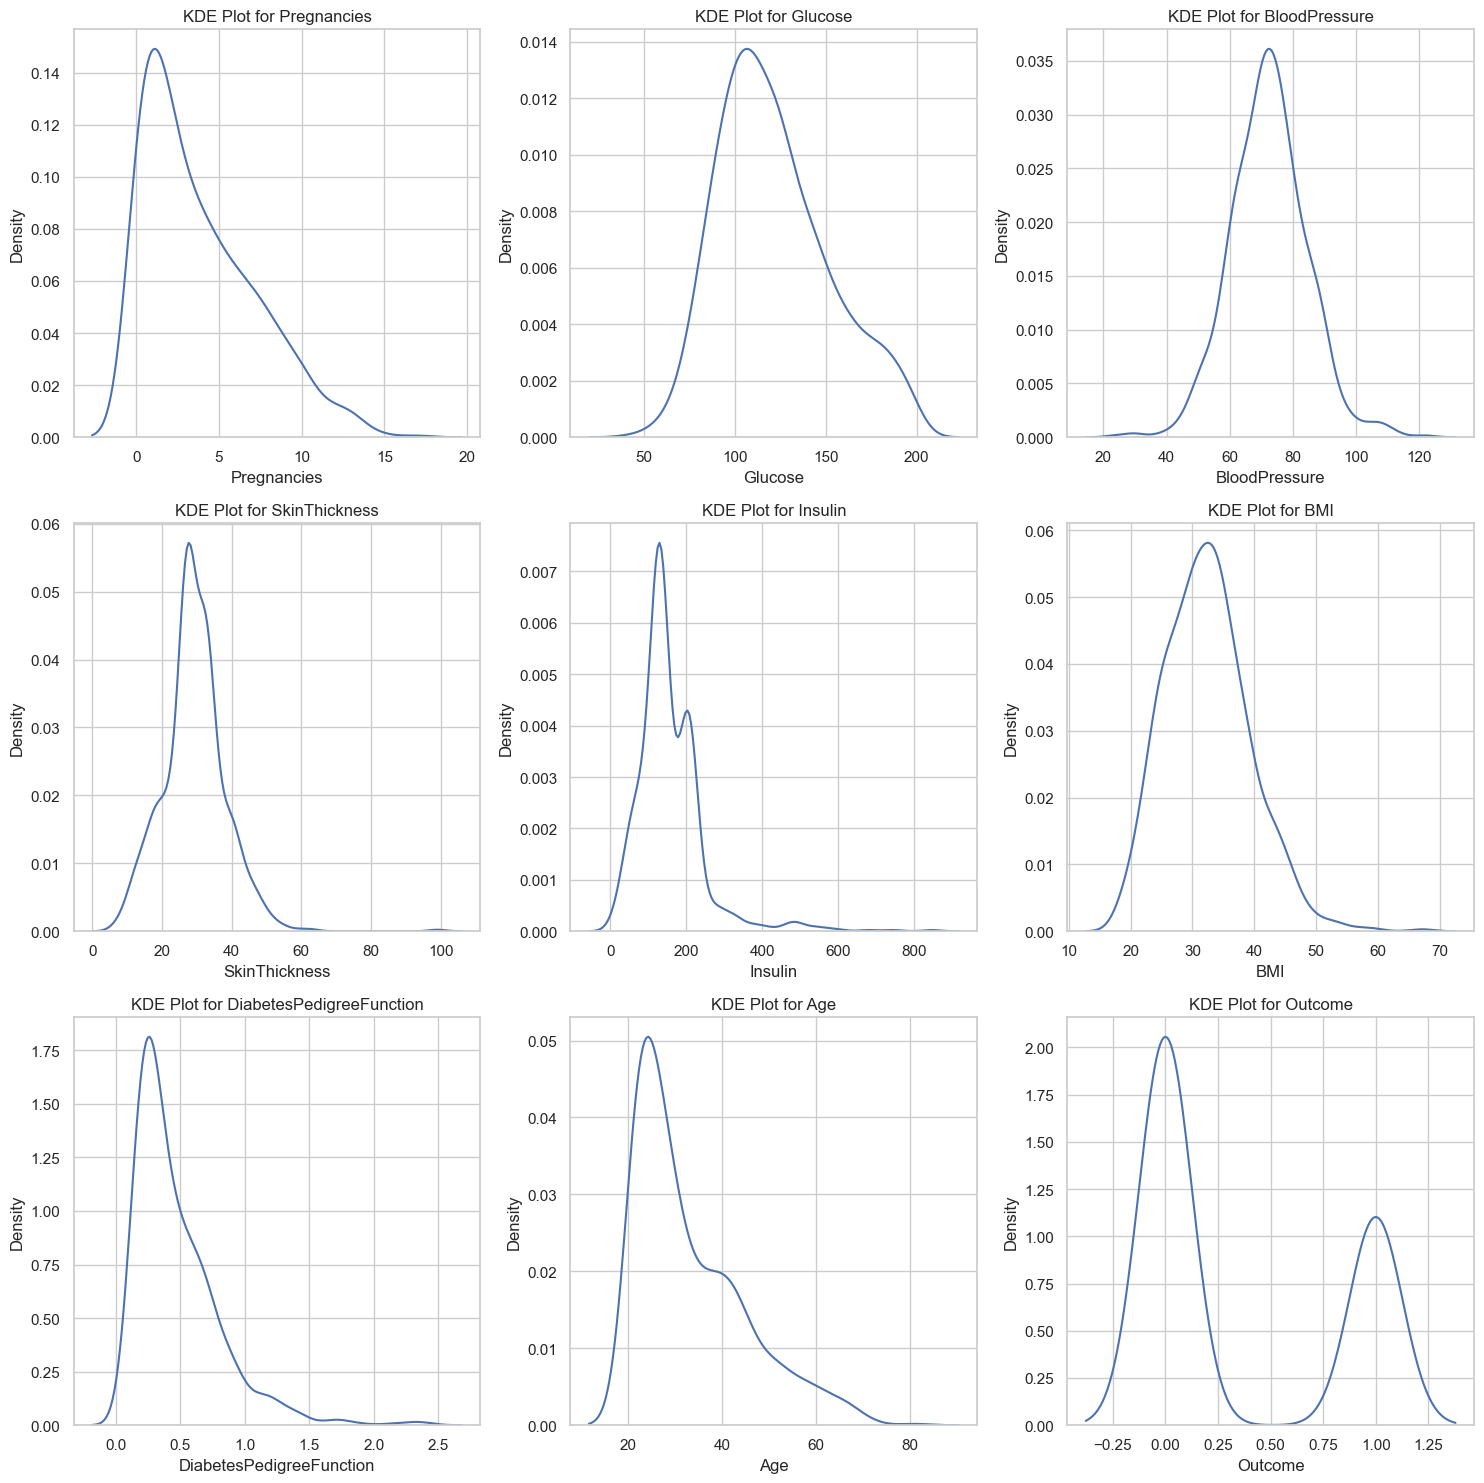

In [17]:
def plots(df):
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    for i, column in enumerate(df.columns):
        row = i // 3
        col = i % 3
        sns.kdeplot(x=column, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'KDE Plot for {column}')
            
    plt.tight_layout()
    plt.show()

plots(df)

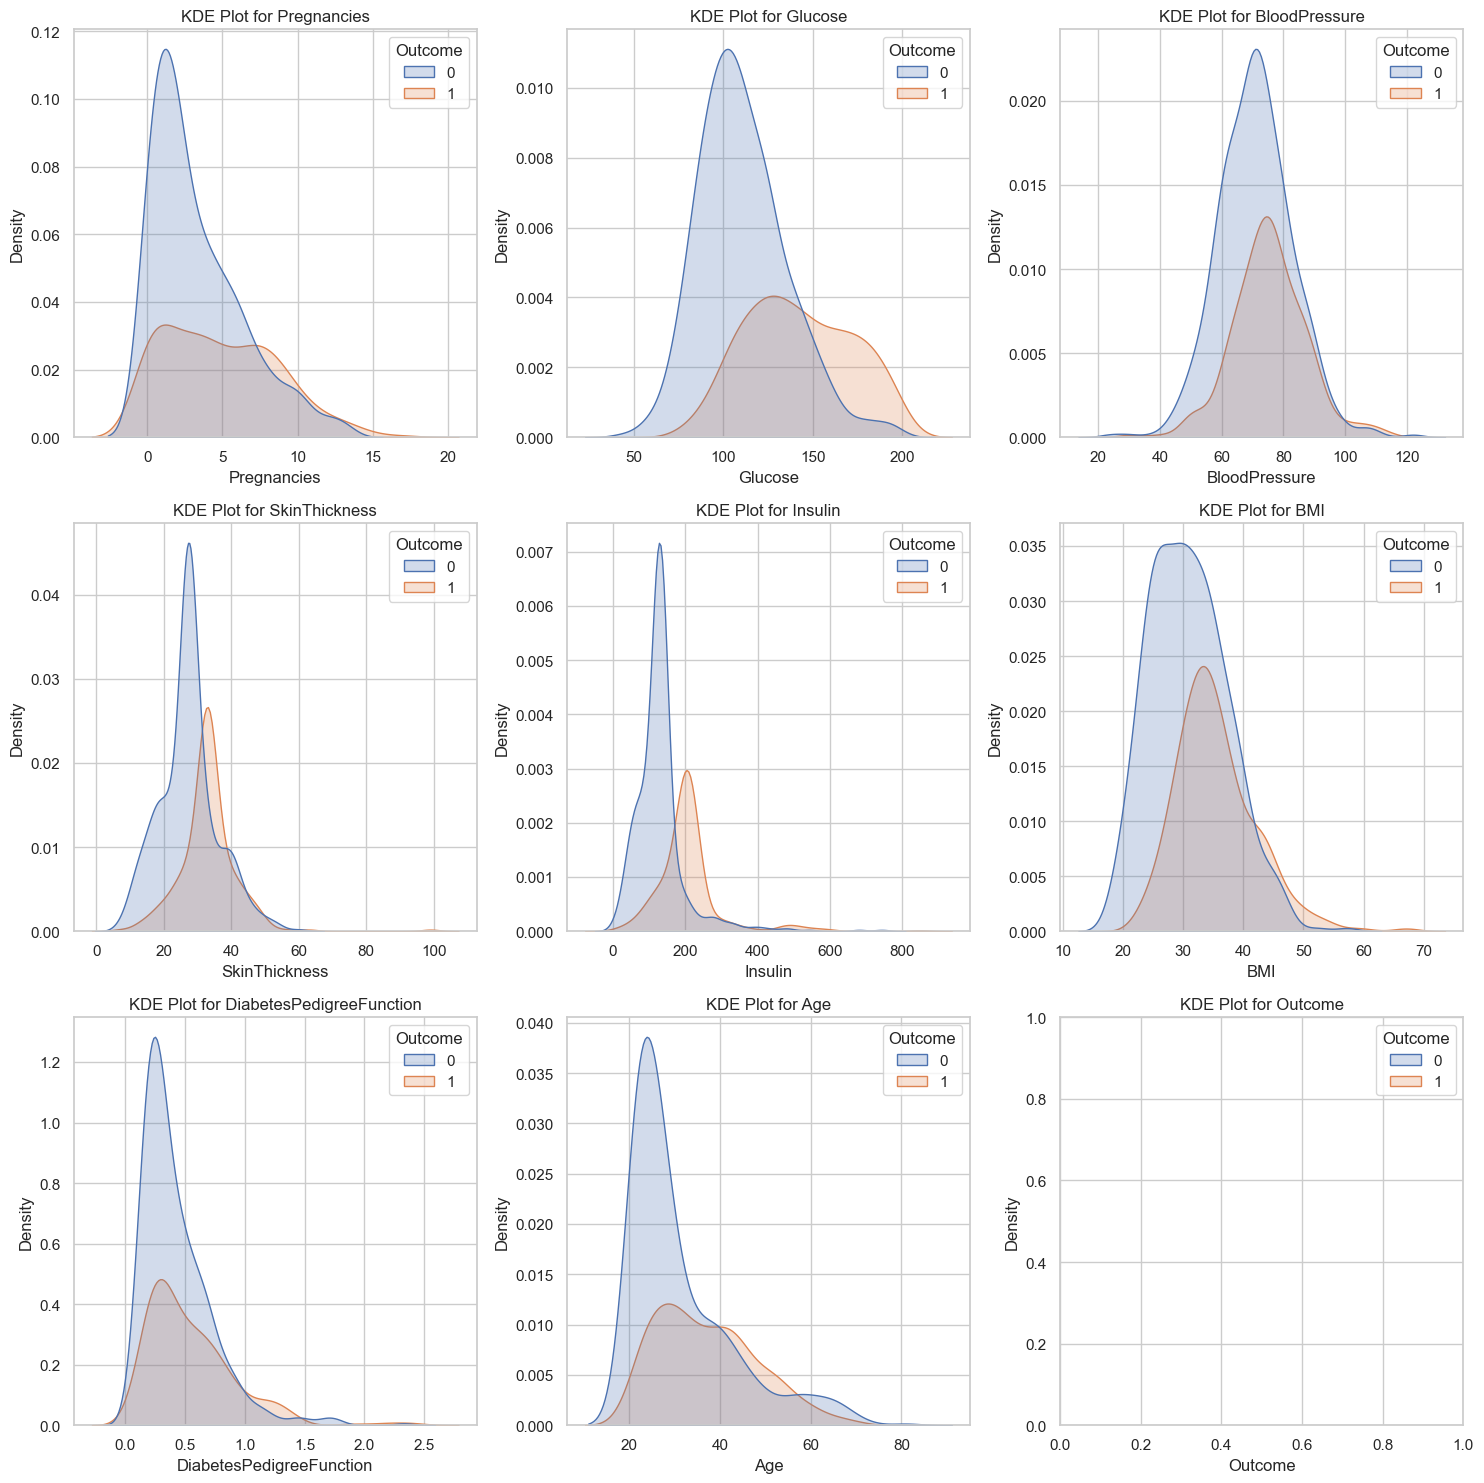

In [18]:
def plots(df):
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    for i, column in enumerate(df.columns):
        row = i // 3
        col = i % 3
        sns.kdeplot(x=column, data=df, ax=axes[row, col],hue="Outcome",fill=True)
        axes[row, col].set_title(f'KDE Plot for {column}')
            
    plt.tight_layout()
    plt.show()

plots(df)

## Outliers

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plots(df):
    fig = make_subplots(rows=3, cols=3, subplot_titles=df.columns)

    for i, column in enumerate(df.columns):
        row = i // 3 + 1
        col = i % 3 + 1

        trace = go.Box(x=df[column], name=f'Box Plot for {column}')
        fig.add_trace(trace, row=row, col=col)

    fig.update_layout(title='Box Plots', height=1500, width=3000)
    fig.show()

# Assuming you have a DataFrame named df
plots(df)


In [20]:
# Detecting outliers
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# The Percentage of outliers in numerical features
for column in df.select_dtypes(include=[np.number]):
    outliers = detect_outliers_iqr(df[column])
    percentage_outliers = (sum(outliers) / len(df)) * 100
    print(f"Percentage of outliers in {column}: {percentage_outliers}%")

Percentage of outliers in Pregnancies: 0.5208333333333333%
Percentage of outliers in Glucose: 0.0%
Percentage of outliers in BloodPressure: 1.8229166666666667%
Percentage of outliers in SkinThickness: 6.901041666666667%
Percentage of outliers in Insulin: 3.515625%
Percentage of outliers in BMI: 1.0416666666666665%
Percentage of outliers in DiabetesPedigreeFunction: 3.7760416666666665%
Percentage of outliers in Age: 1.171875%
Percentage of outliers in Outcome: 0.0%


## Power Transformation

In [21]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.530932
BloodPressure               0.131514
SkinThickness               0.761818
Insulin                     2.622728
BMI                         0.602144
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [22]:
def plot_transform(col):
    fig, ax = plt.subplots(1,  3, figsize = (16, 3))
    sns.kdeplot(col, fill = True, ax =ax[0])
    ax[0].set_title(col.columns[0])
    
    sns.kdeplot(np.log(col), fill = True, ax =ax[1])
    ax[1].set_title(f'{col.columns[0]} log transform')
    
    sns.kdeplot(np.sqrt(col), fill = True, ax =ax[2])
    ax[2].set_title(f'{col.columns[0]} square root transform')

    plt.show()

In [23]:
columns_to_transform = ["SkinThickness","Insulin","DiabetesPedigreeFunction","Age","BMI"]

for col in columns_to_transform:
    df[[col]] = np.log(df[[col]])

In [24]:
df["Pregnancies"] = np.log(df["Pregnancies"] +1)

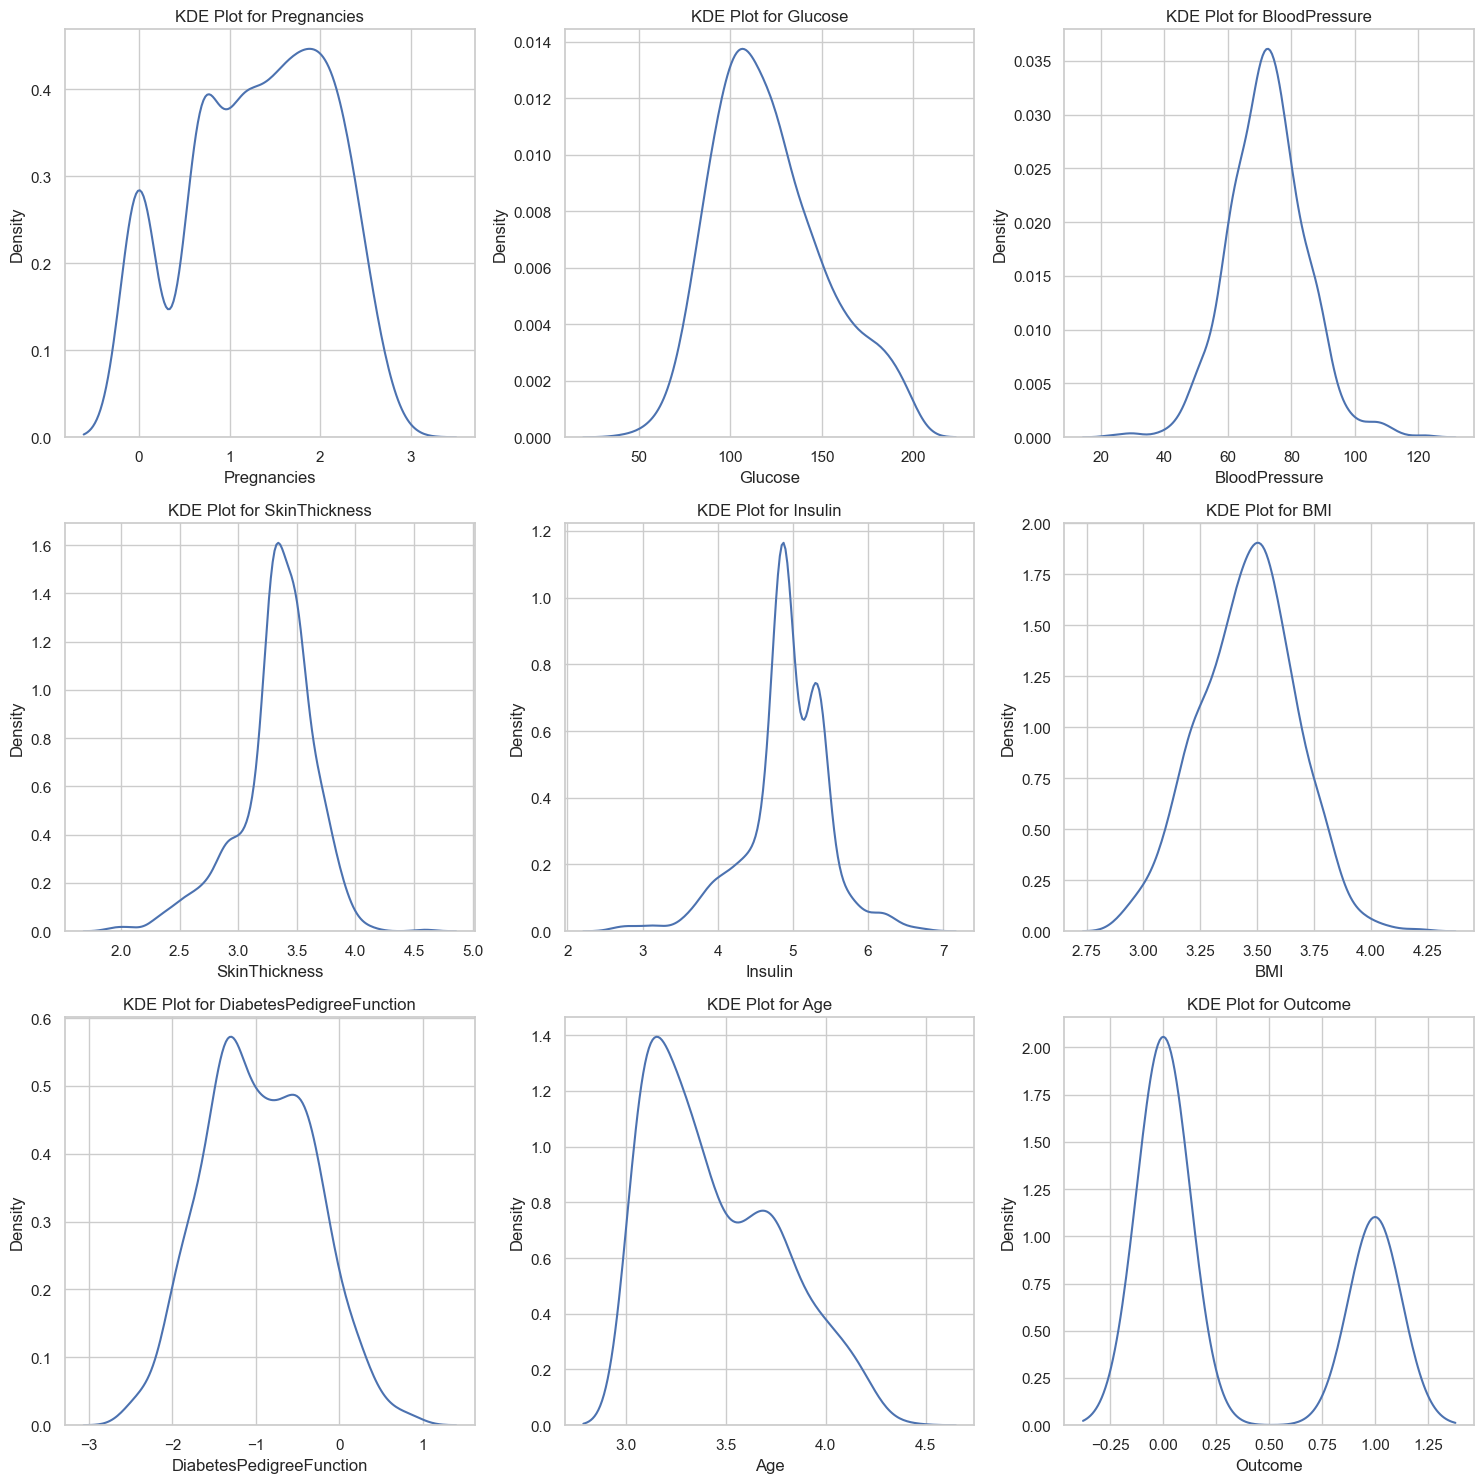

In [25]:
def plots(df):
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    for i, column in enumerate(df.columns):
        row = i // 3
        col = i % 3
        sns.kdeplot(x=column, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'KDE Plot for {column}')
            
    plt.tight_layout()
    plt.show()

plots(df)

## Correlation

In [26]:
df.corr().style.background_gradient(cmap='YlOrBr')

## **From this exploration we gained some info :**
* BloodPressure & SkinThickness are the least in correlation with the outcome.
* We have some wrong values in some columns like 0 BloodPressure and some outliers.
* Some of the data are right skewed.
* From the plots these featuers seem to have the least affection on the outcome.

# Preproccessing

In [27]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       1.945910    148.0           72.0       3.555348  5.331975  3.514526   
1       0.693147     85.0           66.0       3.367296  4.869746  3.280911   
2       2.197225    183.0           64.0       3.496508  5.331975  3.148453   
3       0.693147     89.0           66.0       3.135494  4.543295  3.335770   
4       0.000000    137.0           40.0       3.555348  5.123964  3.763523   
..           ...      ...            ...            ...       ...       ...   
763     2.397895    101.0           76.0       3.871201  5.192957  3.493473   
764     1.098612    122.0           70.0       3.295837  4.869746  3.605498   
765     1.791759    121.0           72.0       3.135494  4.718499  3.265759   
766     0.693147    126.0           60.0       3.496508  5.331975  3.404525   
767     0.693147     93.0           70.0       3.433987  4.869746  3.414443   

     DiabetesPedigreeFunction       Age  Outcome  
0                   -0.466809  3.912023        1  
1                   -1.046969  3.433987        0  
2                   -0.397497  3.465736        1  
3                   -1.789761  3.044522        0  
4                    0.827678  3.496508        1  
..                        ...       ...      ...  
763                 -1.766092  4.143135        0  
764                 -1.078810  3.295837        0  
765                 -1.406497  3.401197        0  
766                 -1.052683  3.850148        1  
767                 -1.155183  3.135494        0  

[768 rows x 9 columns]

In [28]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      1.310613  121.697358      72.428141       3.325295    4.921146   
std       0.769830   30.462008      12.106044       0.332256    0.536686   
min       0.000000   44.000000      24.000000       1.945910    2.639057   
25%       0.693147   99.750000      64.000000       3.218876    4.799889   
50%       1.386294  117.000000      72.000000       3.332205    4.869746   
75%       1.945910  141.000000      80.000000       3.496508    5.331975   
max       2.890372  199.000000     122.000000       4.595120    6.740519   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     3.457463                 -0.959940    3.448802    0.348958  
std      0.210911                  0.644322    0.322702    0.476951  
min      2.901422                 -2.551046    3.044522    0.000000  
25%      3.314186                 -1.411614    3.178054    0.000000  
50%      3.467296                 -0.987526    3.367296    0.000000  
75%      3.600048                 -0.468006    3.713572    1.000000  
max      4.206184                  0.883768    4.394449    1.000000

## Full Pipeline & Splitting the data

In [29]:
x = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [30]:
preproccessing = Pipeline([
    ("scaler",StandardScaler())
])

In [31]:
cleaning = ColumnTransformer([
    ("preproccessing", preproccessing, ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
], remainder = "passthrough")

x = cleaning.fit_transform(x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Baseline Model

In [33]:
base = DummyClassifier(strategy = "constant", constant = 0)
base.fit(x_train, y_train)
y_pred_base = base.predict(x_test)

print(f"Your baseline model achieves accuracy = {accuracy_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves f1 = {f1_score(y_test, y_pred_base)}")
print(f"Your baseline model achieves roc_auc = {roc_auc_score(y_test, y_pred_base)}")

Your baseline model achieves accuracy = 0.6948051948051948
Your baseline model achieves f1 = 0.0
Your baseline model achieves roc_auc = 0.5


# Modeling

## Choosing the best params for my models with RandomizedSearchCV

In [34]:
models_params = {
    LogisticRegression(): {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'max_iter': [100, 500, 1000],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    },
    SGDClassifier(): {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'loss': ['hinge', 'log', 'modified_huber'],
        'max_iter': [1000, 2000, 5000],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'class_weight': [None, 'balanced']
    },
    SVC(): {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4],
        'class_weight': [None, 'balanced']
    },
    DecisionTreeClassifier(): {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    KNeighborsClassifier(): {
        'n_neighbors': [5, 10, 15, 20],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'leaf_size': [10, 20, 30],
        'p': [1, 2]
    },
    RandomForestClassifier(): {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'random_state': [0,21,42,63]
    },
    BaggingClassifier(): {
        'n_estimators': [50, 100, 200],
        'max_samples': [0.5, 0.7, 1.0, 1.5, 2.0],
        'max_features': [0.5, 0.7, 1.0],
        'bootstrap_features': [False, True],
        'random_state': [0,21,42,63]
    }
}

best_model = None
best_score = 0 
best_y_pred = None

models_scores_cv = pd.DataFrame(columns=["accuracy", "roc_auc", "f1"])

for model, param_grid in models_params.items():
   
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20, cv=5, scoring='roc_auc', random_state=42)
    
    random_search.fit(x_train, y_train)
    
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    best_model.fit(x_train, y_train)

    y_pred = best_model.predict(x_test)

    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    models_scores_cv.loc[model.__class__.__name__] = [random_search.best_score_, roc_auc, f1]

    print(f"{model.__class__.__name__} is Done.")
    print(f"The best hyperparameters are: {best_params}")
    print(f"The ROC AUC of the best model is: {roc_auc}")
    print(f"The F1 Score of the best model is: {f1}")

print(f"The best model is: {best_model.__class__.__name__}")
print(f"The best hyperparameters are: {best_params}")
print(f"The ROC AUC of the best model is: {roc_auc}")
print(f"The F1 Score of the best model is: {f1}")

LogisticRegression is Done.
The best hyperparameters are: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.1}
The ROC AUC of the best model is: 0.8593159673891428
The F1 Score of the best model is: 0.7747747747747749
SGDClassifier is Done.
The best hyperparameters are: {'penalty': 'l1', 'max_iter': 5000, 'loss': 'modified_huber', 'class_weight': 'balanced', 'alpha': 0.01}
The ROC AUC of the best model is: 0.8261085702923046
The F1 Score of the best model is: 0.7428571428571429
SVC is Done.
The best hyperparameters are: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'class_weight': 'balanced', 'C': 1}
The ROC AUC of the best model is: 0.8414197653609067
The F1 Score of the best model is: 0.761904761904762
DecisionTreeClassifier is Done.
The best hyperparameters are: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}
The ROC AUC of the best model is: 0.8647842513422151
The F1 Score of the best model is: 0

In [35]:
models = [
    LogisticRegression(random_state = 42),
    SGDClassifier(random_state = 42),
    SVC(random_state = 42),
    DecisionTreeClassifier(random_state = 2),
    KNeighborsClassifier(weights= 'distance', p =1, n_neighbors= 20, leaf_size =10, algorithm ='auto'),
    RandomForestClassifier(random_state = 2,n_estimators =100, min_samples_split =10, min_samples_leaf =4, max_depth= None, criterion= 'entropy'),
    BaggingClassifier(random_state = 2,n_estimators =100, max_samples= 1.0, max_features= 0.5, bootstrap_features =False)
]

best_model = None
best_score = 0
best_y_pred = None

models_scores_cv = pd.DataFrame(columns=["accuracy", "roc_auc", "f1"])

for model in models:
    cv_scores_acc = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score_acc = np.mean(cv_scores_acc)

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    models_scores_cv.loc[model.__class__.__name__] = [mean_cv_score_acc, roc_auc, f1]
    
    if f1 > best_score:  
        best_score = f1
        best_model = model
        best_y_pred = y_pred 

    print(f"{model.__class__.__name__} is Done.")

print(f"The best model is: {best_model.__class__.__name__}")
print(f"The f1 of the best model is: {best_score}")


LogisticRegression is Done.
SGDClassifier is Done.
SVC is Done.
DecisionTreeClassifier is Done.
KNeighborsClassifier is Done.
RandomForestClassifier is Done.
BaggingClassifier is Done.
The best model is: BaggingClassifier
The f1 of the best model is: 0.9032258064516129


In [36]:
models_scores_cv.sort_values(by = "f1", ascending = False)

accuracy   roc_auc        f1
BaggingClassifier       0.879448  0.928117  0.903226
RandomForestClassifier  0.871318  0.909425  0.865979
DecisionTreeClassifier  0.824084  0.870750  0.803922
KNeighborsClassifier    0.840384  0.857526  0.800000
SVC                     0.833840  0.828196  0.755102
LogisticRegression      0.801293  0.805627  0.731183
SGDClassifier           0.733040  0.803539  0.720000

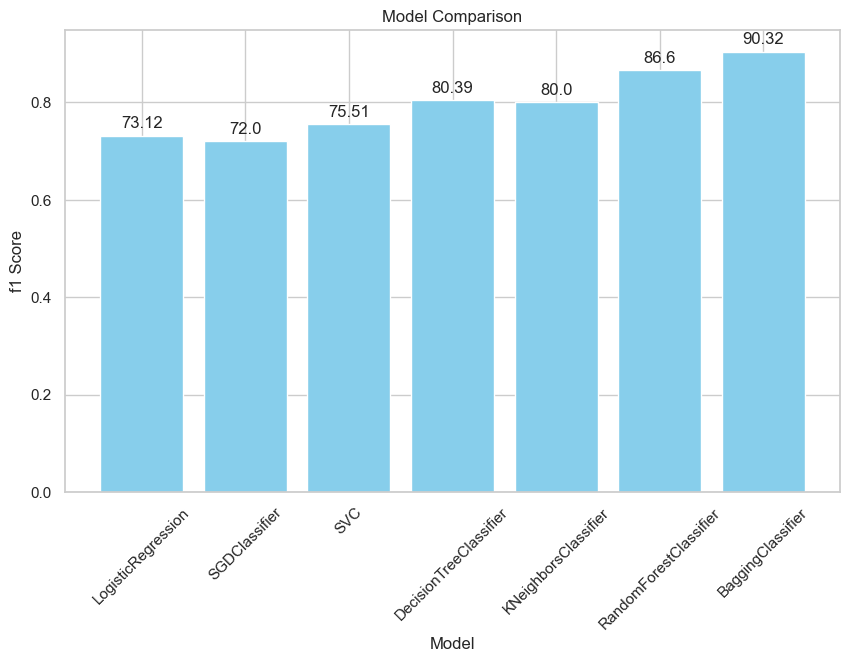

In [37]:
plt.figure(figsize=(10, 6))
bars = plt.bar(models_scores_cv.index, models_scores_cv['f1'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('f1 Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval*100, 2), ha='center', va='bottom')

plt.show()

- **Seems like BaggingClassifier is the best model.**

In [42]:
report = classification_report(y_test, best_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       107
           1       0.91      0.89      0.90        47

    accuracy                           0.94       154
   macro avg       0.93      0.93      0.93       154
weighted avg       0.94      0.94      0.94       154



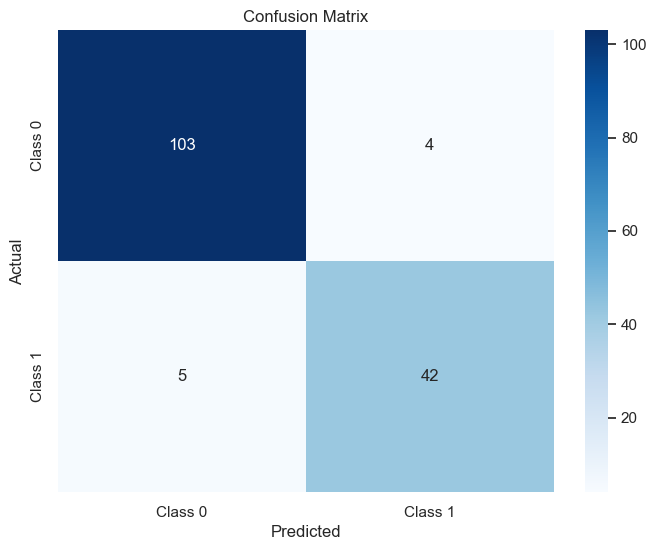

In [43]:
conf_mat = confusion_matrix(y_test, best_y_pred)
conf_mat

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

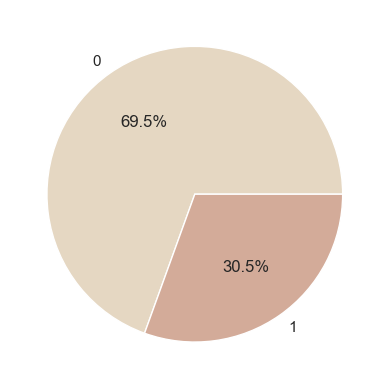

In [40]:
unique_values, counts = np.unique(y_test, return_counts=True)
plt.pie(counts, labels=unique_values, colors=sns.color_palette("ch:.25"), autopct='%1.1f%%')
plt.show()

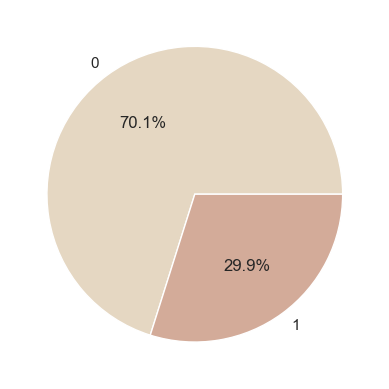

In [41]:
unique_values, counts = np.unique(best_y_pred, return_counts=True)
plt.pie(counts, labels=unique_values, colors=sns.color_palette("ch:.25"), autopct='%1.1f%%')
plt.show()